In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from keras.layers import Dense, Dropout,InputLayer
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split as tts
from keras.models import Sequential  

In [2]:
 data = pd.read_csv("emergency_classification.csv")

In [3]:
data.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [4]:
x = []
for i in data.image_names:
    image = plt.imread("images/"+i)
    x.append(image)
    
x = np.array(x)

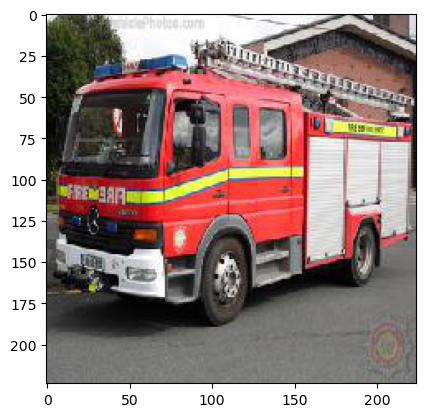

In [5]:
plt.imshow(x[900])
plt.show()

In [6]:
y = data.emergency_or_not.values

In [7]:
x.shape

(2352, 224, 224, 3)

In [8]:
x = x.reshape(x.shape[0], 224*224*3)

In [9]:
x.shape

(2352, 150528)

In [10]:
x = x/x.max()

In [11]:
x.max(), x.min()

(1.0, 0.0)

In [12]:
train_x, val_x, train_y, val_y = tts(x, y, test_size = 0.3, random_state=42)

In [13]:
(train_x.shape, val_x.shape),( train_y.shape, val_y.shape )

(((1646, 150528), (706, 150528)), ((1646,), (706,)))

In [17]:
from keras.initializers import random_normal, glorot_normal, he_normal

In [18]:
model = Sequential()

# he_normal

model.add(InputLayer(input_shape = (224*224*3,)))
model.add(Dense(units =100, kernel_initializer = he_normal(seed = 42) ,activation = "sigmoid"))
model.add(Dense(units = 100 , kernel_initializer = he_normal(seed = 42) , activation = "sigmoid"))
model.add(Dense(units = 1, kernel_initializer = he_normal(seed = 42)  ,activation = "sigmoid"))

In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,063,101 (57.46 MB)

 Trainable params: 15,063,101 (57.46 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
adam = Adam(learning_rate = 1e-7, clipvalue = 1)

In [23]:
model.compile(loss = "binary_crossentropy", optimizer = adam, metrics= ["accuracy"])

In [24]:
history = model.fit(train_x, train_y , validation_data = (val_x, val_y), epochs = 50, batch_size = 128)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 442ms/step - accuracy: 0.4262 - loss: 0.7475 - val_accuracy: 0.4391 - val_loss: 0.7328
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 342ms/step - accuracy: 0.4364 - loss: 0.7304 - val_accuracy: 0.4391 - val_loss: 0.7232
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 318ms/step - accuracy: 0.4051 - loss: 0.7310 - val_accuracy: 0.4391 - val_loss: 0.7149
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 338ms/step - accuracy: 0.4152 - loss: 0.7177 - val_accuracy: 0.4405 - val_loss: 0.7086
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 308ms/step - accuracy: 0.4061 - loss: 0.7111 - val_accuracy: 0.4462 - val_loss: 0.7036
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 309ms/step - accuracy: 0.4364 - loss: 0.7028 - val_accuracy: 0.4448 - val_loss: 0.6998
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 338ms/step - accuracy: 0.4675 - loss: 0.6992 - val_accuracy: 0.4433 - val_loss: 0.6968
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 335ms/step - accuracy: 0.4947 - loss: 0.6939 - val_accuracy: 0

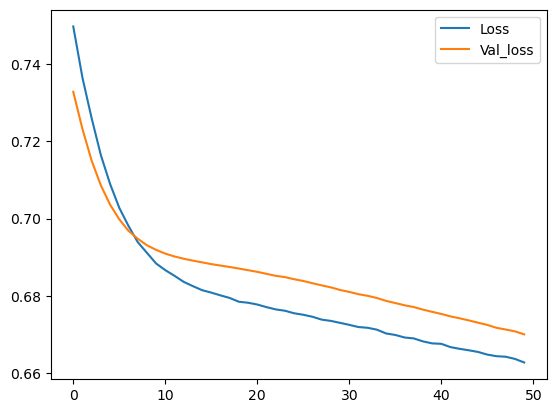

In [25]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["Loss", "Val_loss"])

# glorot_normal

In [26]:
# model.add(InputLayer(input_shape = (224*224*3,)))

model.add(Dense(units =100, kernel_initializer = glorot_normal(seed = 42) ,activation = "sigmoid"))
model.add(Dense(units = 100 , kernel_initializer = glorot_normal(seed = 42) , activation = "sigmoid"))
model.add(Dense(units = 1, kernel_initializer = glorot_normal(seed = 42)  ,activation = "sigmoid"))

In [27]:
adam = Adam(learning_rate = 1e-5)

In [28]:
model.compile(loss = "binary_crossentropy", optimizer = adam, metrics= ["accuracy"])

In [29]:
history = model.fit(train_x, train_y , validation_data = (val_x, val_y), epochs = 50, batch_size = 128)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 489ms/step - accuracy: 0.4110 - loss: 0.7407 - val_accuracy: 0.4391 - val_loss: 0.7269
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 341ms/step - accuracy: 0.4241 - loss: 0.7319 - val_accuracy: 0.4391 - val_loss: 0.7236
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 302ms/step - accuracy: 0.3981 - loss: 0.7362 - val_accuracy: 0.4391 - val_loss: 0.7204
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 490ms/step - accuracy: 0.4059 - loss: 0.7298 - val_accuracy: 0.4391 - val_loss: 0.7175
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 306ms/step - accuracy: 0.4101 - loss: 0.7250 - val_accuracy: 0.4391 - val_loss: 0.7148
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 315ms/step - accuracy: 0.4115 - loss: 0.7213 - val_accuracy: 0.4391 - val_loss: 0.7122
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 306ms/step - accuracy: 0.4268 - loss: 0.7148 - val_accuracy: 0.4391 - val_loss: 0.7099
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 308ms/step - accuracy: 0.4089 - loss: 0.7157 - val_accuracy: 0

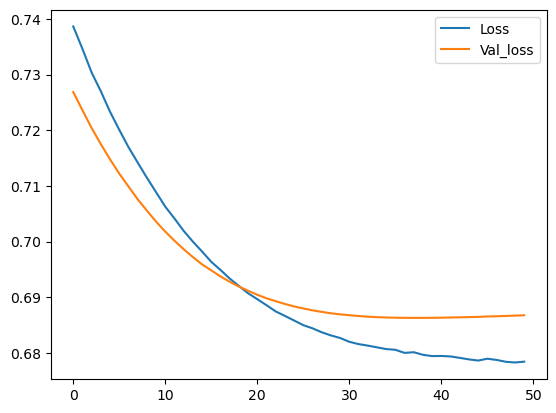

In [30]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["Loss", "Val_loss"])

# random_normal

In [33]:
# model.add(InputLayer(input_shape = (224*224*3,)))
model.add(Dense(units =100, kernel_initializer = random_normal(mean = 0 , stddev = 0.05,seed = 42) ,activation = "sigmoid"))
model.add(Dense(units = 100 , kernel_initializer = random_normal(mean = 0 , stddev = 0.05,seed = 42) , activation = "sigmoid"))
model.add(Dense(units = 1, kernel_initializer = random_normal(mean = 0 , stddev = 0.05,seed = 42)  ,activation = "sigmoid"))

In [34]:
adam = Adam(learning_rate = 1e-5)

In [35]:
model.compile(loss = "binary_crossentropy", optimizer = adam, metrics= ["accuracy"])

In [36]:
history = model.fit(train_x, train_y , validation_data = (val_x, val_y), epochs = 50, batch_size = 128)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 421ms/step - accuracy: 0.5956 - loss: 0.6927 - val_accuracy: 0.5609 - val_loss: 0.6924
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 300ms/step - accuracy: 0.5757 - loss: 0.6919 - val_accuracy: 0.5609 - val_loss: 0.6917
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 300ms/step - accuracy: 0.5824 - loss: 0.6909 - val_accuracy: 0.5609 - val_loss: 0.6911
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 304ms/step - accuracy: 0.5891 - loss: 0.6898 - val_accuracy: 0.5609 - val_loss: 0.6906
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 296ms/step - accuracy: 0.5748 - loss: 0.6896 - val_accuracy: 0.5609 - val_loss: 0.6901
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 294ms/step - accuracy: 0.5683 - loss: 0.6893 - val_accuracy: 0.5609 - val_loss: 0.6897
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 438ms/step - accuracy: 0.5784 - loss: 0.6881 - val_accuracy: 0.5609 - val_loss: 0.6892
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 487ms/step - accuracy: 0.5890 - loss: 0.6866 - val_accuracy: 

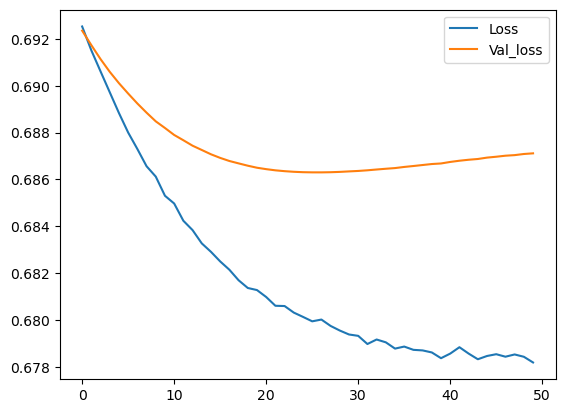

In [37]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["Loss", "Val_loss"])

# Batch Normalization

In [40]:
from keras.layers import BatchNormalization

In [44]:
# model.add(InputLayer(input_shape = (224*224*3,)))
model.add(Dense(units =100, activation = "sigmoid"))
model.add(Dense(units = 100 ,  activation = "sigmoid"))
model.add(BatchNormalization())
model.add(Dense(units = 1,  activation = "sigmoid"))

In [45]:
adam = Adam(learning_rate = 1e-5)

In [46]:
model.compile(loss = "binary_crossentropy", optimizer = adam, metrics= ["accuracy"])

In [47]:
history = model.fit(train_x, train_y , validation_data = (val_x, val_y), epochs = 50, batch_size = 128)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 585ms/step - accuracy: 0.5821 - loss: 0.6931 - val_accuracy: 0.5609 - val_loss: 0.6998
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 429ms/step - accuracy: 0.5932 - loss: 0.6930 - val_accuracy: 0.5609 - val_loss: 0.6973
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 521ms/step - accuracy: 0.5997 - loss: 0.6928 - val_accuracy: 0.5609 - val_loss: 0.6951
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 443ms/step - accuracy: 0.5901 - loss: 0.6927 - val_accuracy: 0.5609 - val_loss: 0.6933
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 352ms/step - accuracy: 0.5843 - loss: 0.6926 - val_accuracy: 0.5609 - val_loss: 0.6918
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 302ms/step - accuracy: 0.5755 - loss: 0.6925 - val_accuracy: 0.5609 - val_loss: 0.6906
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 288ms/step - accuracy: 0.5815 - loss: 0.6924 - val_accuracy: 0.5609 - val_loss: 0.6895
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 291ms/step - accuracy: 0.6225 - loss: 0.6918 - val_accuracy: 0

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["Loss", "Val_loss"])